# Shampoo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("datos/shampoo.csv")

In [3]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [6]:
data['Date'] = pd.date_range(start='2001-01-01', periods=len(data), freq='M')

data.set_index('Date', inplace=True)

C:\Users\Ale\AppData\Local\Temp\ipykernel_23356\3420977999.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Date'] = pd.date_range(start='2001-01-01', periods=len(data), freq='M')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-31 to 2003-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


## Análisis Exploratorio

In [10]:
print(f"Rango de fechas: {data.index.min().date()} a {data.index.max().date()}")
print(f"Número de días registrados: {data.shape[0]}")

Rango de fechas: 2001-01-31 a 2003-12-31
Número de días registrados: 36


**Mostrar distribución de ventas por mes**

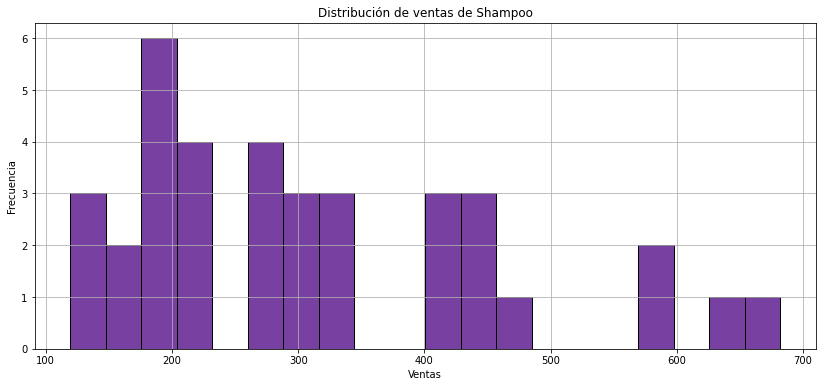

In [12]:
plt.figure(figsize=(14, 6))
sns.histplot(data["Sales"], bins=20, color="indigo")
plt.title("Distribución de ventas de Shampoo")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

El histograma de ventas de shampoo muestra una distribución bastante dispersa y no simétrica, lo que indica una alta variabilidad en las cantidades vendidas mes a mes. Aunque la mayoría de las observaciones se concentran entre los 150 y 300 unidades, hay valores significativamente más altos que alcanzan hasta casi las 700 unidades, lo cual sugiere la presencia de posibles datos atípicos o aumentos repentinos en la demanda. Esta distribución no sigue una forma normal, sino que presenta varios grupos de frecuencias distintas, con algunos intervalos más vacíos, lo que también podría reflejar una tendencia de crecimiento o variaciones estacionales marcadas. 

**Serie de Tiempo**

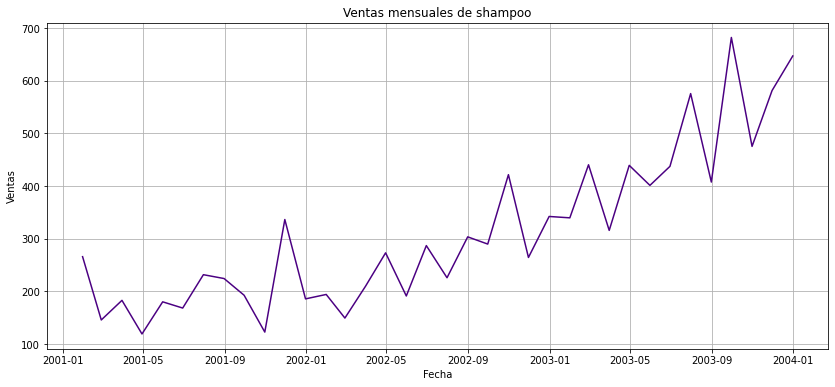

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x=data.index, y="Sales", color="indigo")
plt.title("Ventas mensuales de shampoo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

La serie de tiempo de ventas mensuales de shampoo muestra una clara tendencia creciente a lo largo del periodo 2001–2003. Aunque se observan variaciones mes a mes, es evidente que las ventas tienden a incrementarse progresivamente, lo cual puede atribuirse a un aumento sostenido en la demanda del producto. Esta tendencia ascendente no es completamente suave, ya que se presentan varios picos abruptos y caídas marcadas. Además, la amplitud de las oscilaciones parece incrementarse con el tiempo, lo cual podría ser indicio de una posible varianza no constante.

**Descomposición aditiva**

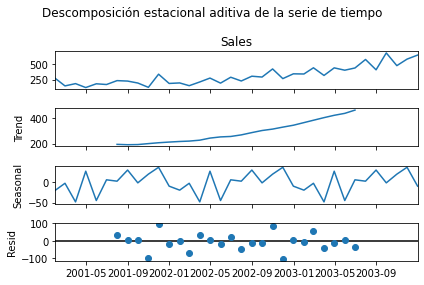

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data['Sales'], model='additive', period=12)
decomp.plot()
plt.suptitle("Descomposición estacional aditiva de la serie de tiempo")
plt.tight_layout()
plt.show()


La descomposición estacional aditiva de las ventas mensuales de shampoo revela una clara tendencia creciente a lo largo del tiempo, lo que sugiere un aumento sostenido en la demanda del producto. Esta tendencia se vuelve más pronunciada a partir de mediados de 2002, indicando una mejora en las ventas.

Además, se identifica una estacionalidad leve pero consistente, con variaciones que se repiten regularmente año con año. Esto indica que ciertos meses tienden a tener mayores o menores ventas, lo cual puede deberse a hábitos de consumo o factores comerciales específicos.

Los residuos, por otro lado, se distribuyen de forma aleatoria alrededor del cero, lo que sugiere que tanto la tendencia como la estacionalidad han sido capturadas adecuadamente por el modelo de descomposición. En conjunto, estos resultados indican que modelos que incluyan componentes de tendencia y estacionalidad, como Holt-Winters o Prophet, podrían ser apropiados para modelar esta serie.

**Generar conjuntos de entrenamiento y prueba respecivamente**

In [20]:
train_size = int(len(data) * 0.7)
train = data["Sales"].iloc[:train_size].copy()
test = data["Sales"].iloc[train_size:].copy()


print(f"Training size: {len(train)}")
print(f"Test size: {len(test)}")

Training size: 25
Test size: 11


## Promedios Móviles

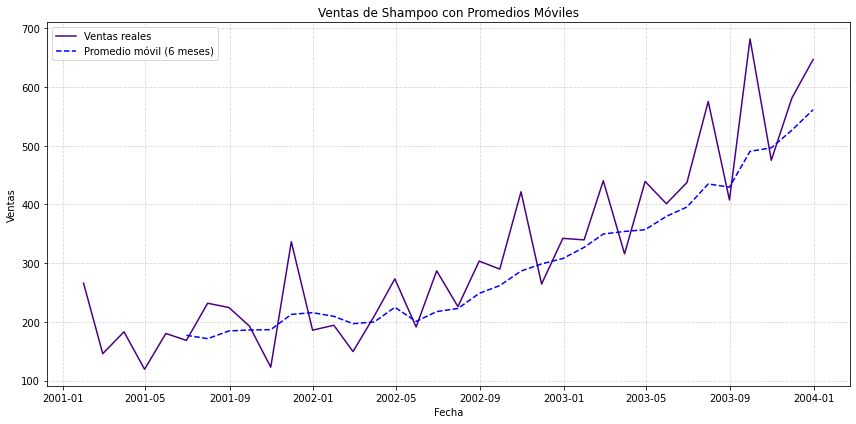

MAE: 52.43
RMSE: 68.70


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Sales'], label='Ventas reales', color='indigo')

# Promedio móvil de 6 meses
data['PM_6'] = data['Sales'].rolling(window=6).mean()
plt.plot(data.index, data['PM_6'], label='Promedio móvil (6 meses)', linestyle='--', color='blue')

plt.title('Ventas de Shampoo con Promedios Móviles')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

valid_data = data.dropna(subset=["PM_6"])

# MAE
mae = mean_absolute_error(valid_data["Sales"], valid_data["PM_6"])

# RMSE
rmse = np.sqrt(mean_squared_error(valid_data["Sales"], valid_data["PM_6"]))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Este gráfico muestra las ventas mensuales de shampoo junto con un promedio móvil de 6 meses, lo cual permite suavizar las variaciones de corto plazo y visualizar mejor la tendencia general.

Se observa claramente que, aunque las ventas reales presentan cierta variabilidad mensual, el promedio móvil sigue una trayectoria ascendente constante. Esto evidencia la presencia de una tendencia creciente en el tiempo, especialmente a partir de mediados de 2002. El promedio móvil permite ver esta tendencia sin que las irregularidades mensuales (como picos o caídas abruptas) distraigan del comportamiento general de la serie.

Además, la línea de promedio móvil se mantiene relativamente cercana a los datos reales, lo cual indica que la ventana de 6 meses es adecuada para captar la dinámica de esta serie sin perder demasiada sensibilidad a los cambios recientes. Este tipo de análisis es útil como paso previo antes de aplicar modelos más complejos, ya que ayuda a confirmar visualmente patrones relevantes como tendencia o estacionalidad.

## Alisamiento Exponencial

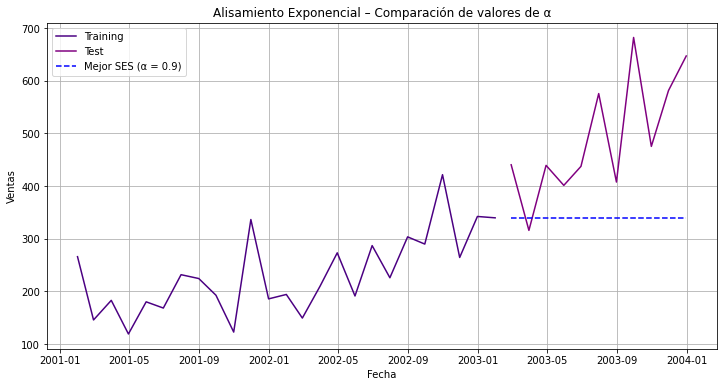

    modelo        RMSE         MAE
4  α = 0.9  186.773055  156.106004
3  α = 0.7  188.964980  158.305373
2  α = 0.5  192.481259  161.807538
1  α = 0.3  203.241750  172.348574
0  α = 0.1  244.857381  219.381844


In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import warnings
warnings.filterwarnings("ignore")

results_ses = []

# Probar diferentes valores de α
for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    modelo = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
    pred = modelo.forecast(len(test))
    pred.index = test.index  

    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)

    results_ses.append({
        'modelo': f'α = {alpha}',
        'alpha': alpha,
        'RMSE': rmse,
        'MAE': mae,
        'predicciones': pred
    })

df_results = pd.DataFrame(results_ses).sort_values(by='RMSE')
mejor_modelo = df_results.iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training', color='indigo')
plt.plot(test.index, test, label='Test', color='purple')

# Mostrar la predicción del mejor α
plt.plot(test.index, mejor_modelo['predicciones'], label=f"Mejor SES ({mejor_modelo['modelo']})", linestyle='--', color='blue')

plt.title('Alisamiento Exponencial – Comparación de valores de α')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

print(df_results[['modelo', 'RMSE', 'MAE']])

Este gráfico representa el resultado del modelo de Alisamiento Exponencial Simple aplicado a las ventas mensuales de shampoo, mostrando la comparación entre los datos de entrenamiento, prueba y las predicciones obtenidas con el mejor valor de α (en este caso, α = 0.9).

El conjunto de entrenamiento (línea continua) cubre la mayor parte de la serie histórica, mientras que el conjunto de prueba corresponde a los últimos meses del periodo. El modelo SES con α = 0.9 produce una línea de predicción constante para el periodo de prueba, reflejando que, al no incorporar componentes de tendencia ni estacionalidad, el modelo estima un único valor basado en la última observación suavizada.

A pesar de que este valor de α prioriza fuertemente los datos más recientes, el SES no logra capturar el crecimiento observado en las ventas reales del periodo de prueba. Esto limita su efectividad en series con tendencia ascendente, como esta. Por lo tanto, aunque el modelo ofrece una predicción sencilla y rápida, no es el más adecuado para representar el comportamiento dinámico de esta serie en particular.

## Holt-Winters

Solo nivel → RMSE: 203.71, MAE: 172.80
Nivel + Tendencia → RMSE: 164.56, MAE: 137.21
Nivel + Estacionalidad → RMSE: 207.18, MAE: 172.34
Nivel + Tendencia + Estacionalidad → RMSE: 169.00, MAE: 134.08


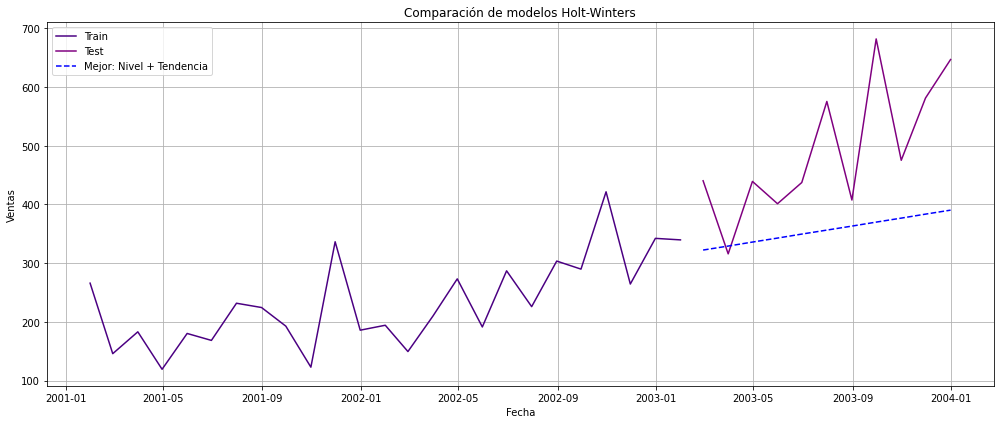

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

configuraciones = [
    {'trend': None, 'seasonal': None, 'label': 'Solo nivel'},
    {'trend': 'add', 'seasonal': None, 'label': 'Nivel + Tendencia'},
    {'trend': None, 'seasonal': 'add', 'seasonal_periods': 7, 'label': 'Nivel + Estacionalidad'},
    {'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 7, 'label': 'Nivel + Tendencia + Estacionalidad'}
]

results_hw = []

# Evaluar cada configuración
for config in configuraciones:
    try:
        modelo = ExponentialSmoothing(
            train,
            trend=config['trend'],
            seasonal=config['seasonal'],
            seasonal_periods=config.get('seasonal_periods')
        ).fit()
        
        pred = modelo.forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, pred))
        mae = mean_absolute_error(test, pred)
        
        results_hw.append({
            'Modelo': config['label'],
            'RMSE': rmse,
            'MAE': mae,
            'Predicción': pred
        })
        
        print(f"{config['label']} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")
        
    except Exception as e:
        print(f"Error en {config['label']}: {e}")

df_resultados = pd.DataFrame(results_hw).sort_values(by='RMSE')

# Mostrar mejor modelo
mejor_modelo = df_resultados.iloc[0]

plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train', color='indigo')
plt.plot(test.index, test, label='Test', color='purple')
plt.plot(test.index, mejor_modelo['Predicción'], label=f"Mejor: {mejor_modelo['Modelo']}", linestyle='--', color='blue')
plt.title('Comparación de modelos Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico muestra la comparación de modelos Holt-Winters aplicados a la serie de ventas de shampoo, específicamente utilizando la versión que incorpora nivel y tendencia, pero no estacionalidad. La línea punteada azul representa las predicciones generadas por el modelo durante el periodo de prueba, mientras que las líneas moradas corresponden a los datos reales de entrenamiento y prueba.

En este caso, el modelo logra capturar parcialmente la tendencia ascendente de la serie, generando una línea de pronóstico creciente en lugar de constante (como en el caso del modelo SES). Sin embargo, la pendiente de la predicción es mucho más suave en comparación con el aumento real observado en las ventas. Esto sugiere que, aunque el modelo reconoce la existencia de una tendencia, no logra ajustarse por completo a la aceleración del crecimiento presente en los datos más recientes.

Este resultado pone en evidencia que, si bien el modelo de Holt con tendencia es superior al SES para datos con crecimiento, aún puede quedarse corto si la serie también presenta una estacionalidad significativa que no está siendo modelada.

## Sarima

SARIMA(0, 0, 0)x(0, 0, 0, 12) → RMSE: 503.07, MAE: 491.17
SARIMA(0, 0, 0)x(0, 0, 1, 12) → RMSE: 372.45, MAE: 357.89
SARIMA(0, 0, 0)x(0, 1, 0, 12) → RMSE: 247.31, MAE: 222.15
SARIMA(0, 0, 0)x(0, 1, 1, 12) → RMSE: 247.31, MAE: 222.15
SARIMA(0, 0, 0)x(1, 0, 0, 12) → RMSE: 194.83, MAE: 165.71
SARIMA(0, 0, 0)x(1, 0, 1, 12) → RMSE: 203.85, MAE: 166.59
SARIMA(0, 0, 0)x(1, 1, 0, 12) → RMSE: 419.05, MAE: 382.12
SARIMA(0, 0, 0)x(1, 1, 1, 12) → RMSE: 247.31, MAE: 222.15
SARIMA(0, 0, 1)x(0, 0, 0, 12) → RMSE: 496.86, MAE: 483.36
SARIMA(0, 0, 1)x(0, 0, 1, 12) → RMSE: 371.23, MAE: 356.74
SARIMA(0, 0, 1)x(0, 1, 0, 12) → RMSE: 245.94, MAE: 220.96
SARIMA(0, 0, 1)x(0, 1, 1, 12) → RMSE: 248.36, MAE: 223.04
SARIMA(0, 0, 1)x(1, 0, 0, 12) → RMSE: 180.97, MAE: 147.26
SARIMA(0, 0, 1)x(1, 0, 1, 12) → RMSE: 152.47, MAE: 120.04
SARIMA(0, 0, 1)x(1, 1, 0, 12) → RMSE: 419.05, MAE: 382.12
SARIMA(0, 0, 1)x(1, 1, 1, 12) → RMSE: 248.36, MAE: 223.04
SARIMA(0, 1, 0)x(0, 0, 0, 12) → RMSE: 186.47, MAE: 155.80
SARIMA(0, 1, 0

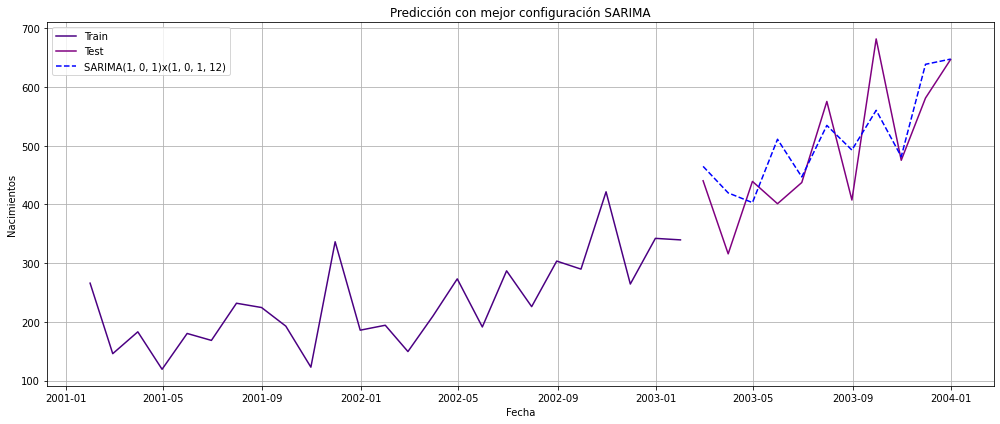

In [29]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Rango de parámetros a probar
p = d = q = range(0, 2)  
P = D = Q = range(0, 2)
s = 12

# Generar combinaciones
param_combinations = list(itertools.product(p, d, q))
seasonal_combinations = list(itertools.product(P, D, Q))

sarima_results = []

# Evaluar cada combinación
for order in param_combinations:
    for seasonal_order in seasonal_combinations:
        try:
            model = SARIMAX(
                train,
                order=order,
                seasonal_order=seasonal_order + (s,),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False)
            
            pred = model.forecast(len(test))
            rmse = np.sqrt(mean_squared_error(test, pred))
            mae = mean_absolute_error(test, pred)

            sarima_results.append({
                'order': order,
                'seasonal_order': seasonal_order,
                'RMSE': rmse,
                'MAE': mae,
                'Predicción': pred
            })
            
            print(f"SARIMA{order}x{seasonal_order + (s,)} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")
            
        except Exception as e:
            print(f"Error con SARIMA{order}x{seasonal_order + (s,)}: {e}")

# Elegir el mejor modelo
df_sarima = pd.DataFrame(sarima_results).sort_values(by='RMSE')
mejor = df_sarima.iloc[0]

# Graficar mejor predicción
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train', color='indigo')
plt.plot(test.index, test, label='Test', color='purple')
plt.plot(test.index, mejor['Predicción'], label=f"SARIMA{mejor['order']}x{mejor['seasonal_order'] + (s,)}", linestyle='--', color='blue')
plt.title('Predicción con mejor configuración SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra la predicción generada por el modelo SARIMA con la mejor configuración encontrada para la serie de ventas de shampoo, la cual incluye componentes autorregresivos y estacionales: SARIMA(1, 0, 1)x(1, 0, 1, 12). En él se observan claramente tres segmentos: los datos de entrenamiento, los datos de prueba y la predicción (línea azul punteada).

A diferencia de modelos más simples como el promedio móvil, SES o Holt, este modelo logra capturar con mayor precisión tanto la tendencia creciente como la estacionalidad presente en los datos. La línea de predicción no solo sigue la dirección ascendente de las ventas, sino que también refleja adecuadamente las oscilaciones recurrentes entre los meses, ajustándose de forma más realista al comportamiento observado en el periodo de prueba.

Debido a su capacidad para incorporar patrones estacionales de largo plazo y dinámica temporal más compleja, el modelo SARIMA demuestra ser el más robusto entre los evaluados. Sus predicciones se acercan mucho a los valores reales, lo que sugiere que logra modelar de forma integral la estructura de la serie.

## Prophet

13:09:44 - cmdstanpy - INFO - Chain [1] start processing
13:09:45 - cmdstanpy - INFO - Chain [1] done processing
13:09:45 - cmdstanpy - INFO - Chain [1] start processing


Config {'changepoint_prior_scale': 0.05, 'seasonality_mode': 'additive'} → RMSE: 437.71, MAE: 404.80


13:10:08 - cmdstanpy - INFO - Chain [1] done processing
13:10:08 - cmdstanpy - INFO - Chain [1] start processing


Config {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive'} → RMSE: 375.73, MAE: 326.75


13:10:09 - cmdstanpy - INFO - Chain [1] done processing
13:10:09 - cmdstanpy - INFO - Chain [1] start processing


Config {'changepoint_prior_scale': 0.05, 'seasonality_mode': 'multiplicative'} → RMSE: 683.64, MAE: 637.54


13:10:32 - cmdstanpy - INFO - Chain [1] done processing


Config {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'} → RMSE: 226.63, MAE: 178.10


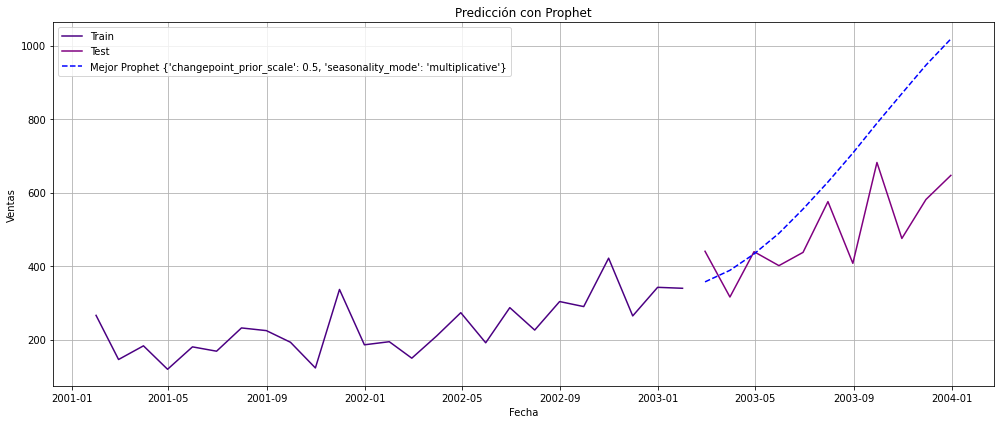

In [32]:
from prophet import Prophet

# Convertir a DataFrame con columnas 'ds' y 'y'
train_df = pd.DataFrame({'ds': train.index, 'y': train.values})
test_df = pd.DataFrame({'ds': test.index, 'y': test.values})

configs = [
    {"changepoint_prior_scale": 0.05, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.05, "seasonality_mode": "multiplicative"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "multiplicative"},
]

results_prophet = []

for config in configs:
    model = Prophet(
        changepoint_prior_scale=config["changepoint_prior_scale"],
        seasonality_mode=config["seasonality_mode"]
    )
    
    model.fit(train_df)

    future = model.make_future_dataframe(periods=len(test_df), freq="D")
    forecast = model.predict(future)

    y_pred = forecast[['ds', 'yhat']].iloc[-len(test_df):]["yhat"].values
    y_true = test_df["y"].values

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    results_prophet.append({
        "config": config,
        "RMSE": rmse,
        "MAE": mae,
        "yhat": y_pred
    })

    print(f"Config {config} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Elegir mejor configuración
df_resultados = pd.DataFrame(results_prophet)
mejor = df_resultados.sort_values(by="RMSE").iloc[0]

plt.figure(figsize=(14, 6))
plt.plot(train_df['ds'], train_df['y'], label='Train', color='indigo')
plt.plot(test_df['ds'], test_df['y'], label='Test', color='purple')
plt.plot(test_df['ds'], mejor['yhat'], label=f"Mejor Prophet {mejor['config']}", linestyle='--', color='blue')
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En este gráfico se presenta la predicción generada por el modelo Prophet utilizando su mejor configuración, que incluye un valor de changepoint_prior_scale de 0.5 y un seasonality_mode multiplicativo. Se comparan los datos de entrenamiento y prueba con la predicción representada por la línea azul punteada.

Aunque Prophet logra capturar el comportamiento general creciente de la serie, su pronóstico sobreestima significativamente las ventas en el periodo de prueba. Esto se observa en cómo la línea de predicción se eleva de forma exponencial, alejándose progresivamente de los valores reales. 


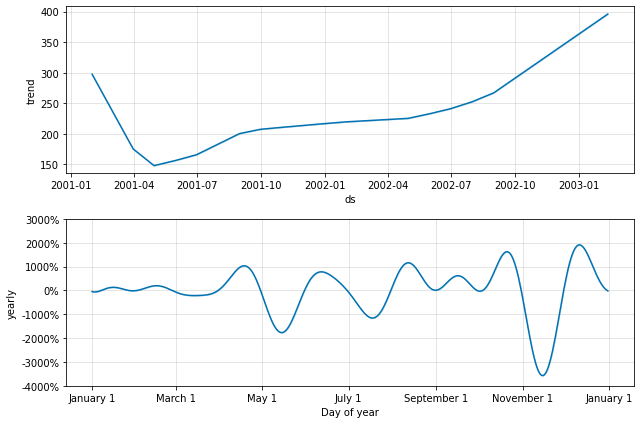

In [33]:
model.plot_components(forecast)
plt.tight_layout()
plt.show()


Este gráfico muestra los componentes descompuestos por Prophet: la tendencia (arriba) y la estacionalidad anual (abajo) de la serie de tiempo del dataset del shampoo.

En la primera gráfica, se observa que la tendencia presenta una caída pronunciada a principios de 2001, seguida de una recuperación y crecimiento sostenido a partir de mediados de ese año hasta inicios de 2003. Esto indica un cambio estructural inicial, posiblemente por un evento puntual o estacional, seguido de un crecimiento constante en las ventas.

En la segunda gráfica, la estacionalidad anual revela fluctuaciones complejas a lo largo del año. Se identifican picos positivos y negativos en distintas fechas, destacando variaciones abruptas alrededor de mayo, agosto y noviembre. La amplitud de estas oscilaciones estacionales sugiere que la demanda de shampoo varía considerablemente según la época del año, posiblemente debido a factores como el clima, campañas de marketing o hábitos de consumo estacionales. Prophet logra capturar esta dinámica no lineal, lo que puede ser útil para pronósticos más ajustados en presencia de patrones repetitivos.

## Comparación de modelos

         Modelo                                      Configuración  \
0           SES                                            α = 0.9   
1  Holt-Winters                                  Nivel + Tendencia   
2        SARIMA       order=(1, 0, 1), seasonal_order=(1, 0, 1, 7)   
3       Prophet  {'changepoint_prior_scale': 0.5, 'seasonality_...   

         RMSE         MAE  
0  186.773055  156.106004  
1  164.563014  137.214149  
2   68.663427   54.149679  
3  226.627851  178.098009  


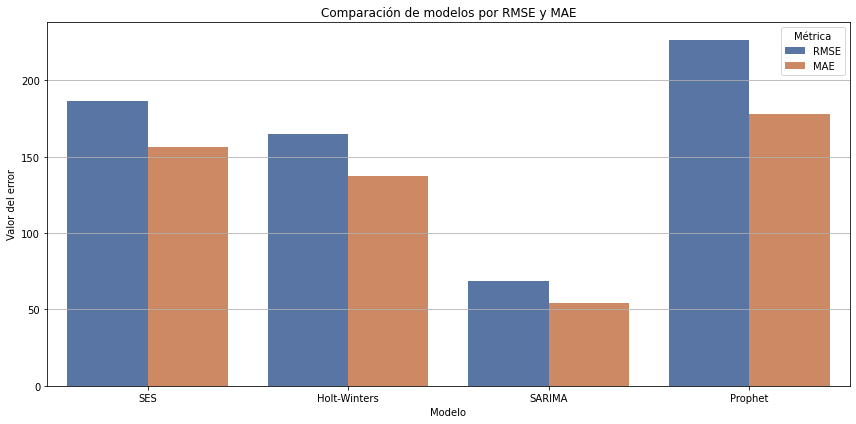

In [34]:
# Extraer el mejor modelo de cada técnica
mejor_ses = pd.DataFrame(results_ses).sort_values(by="RMSE").iloc[0]
mejor_hw = pd.DataFrame(results_hw).sort_values(by="RMSE").iloc[0]
mejor_sarima = pd.DataFrame(sarima_results).sort_values(by="RMSE").iloc[0]
mejor_prophet = pd.DataFrame(results_prophet).sort_values(by="RMSE").iloc[0]

# Resumen comparativo
resumen = pd.DataFrame([
    {
        "Modelo": "SES",
        "Configuración": mejor_ses["modelo"],
        "RMSE": mejor_ses["RMSE"],
        "MAE": mejor_ses["MAE"]
    },
    {
        "Modelo": "Holt-Winters",
        "Configuración": mejor_hw["Modelo"],
        "RMSE": mejor_hw["RMSE"],
        "MAE": mejor_hw["MAE"]
    },
    {
        "Modelo": "SARIMA",
        "Configuración": f"order={mejor_sarima['order']}, seasonal_order={mejor_sarima['seasonal_order'] + (7,)}",
        "RMSE": mejor_sarima["RMSE"],
        "MAE": mejor_sarima["MAE"]
    },
    {
        "Modelo": "Prophet",
        "Configuración": mejor_prophet["config"],
        "RMSE": mejor_prophet["RMSE"],
        "MAE": mejor_prophet["MAE"]
    }
])

print(resumen)

resumen_largo = resumen.melt(id_vars="Modelo", value_vars=["RMSE", "MAE"], var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resumen_largo, x="Modelo", y="Valor", hue="Métrica", palette="deep")
plt.title("Comparación de modelos por RMSE y MAE")
plt.ylabel("Valor del error")
plt.xlabel("Modelo")
plt.legend(title="Métrica")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Este gráfico compara el desempeño de los cuatro modelos utilizados (SES, Holt-Winters, SARIMA y Prophet) en el dataset de ventas de shampoo, utilizando como métricas el `RMSE` (Root Mean Square Error) y el `MAE` (Mean Absolute Error).

Se observa que **SARIMA** es el modelo que obtiene el menor error, tanto en RMSE como en `MAE`, lo que indica que fue el más preciso en sus predicciones. Le sigue el modelo Holt-Winters, que también logra un desempeño aceptable, superando al modelo SES (Simple Exponential Smoothing), que presenta errores más altos.

Por otro lado, el modelo Prophet muestra el peor desempeño con los errores más elevados en ambas métricas. Esto sugiere que, a pesar de su flexibilidad, Prophet no logró ajustarse bien a los patrones específicos de este conjunto de datos, posiblemente por una sobreestimación de la tendencia en el periodo de prueba.

En conclusión, el modelo **SARIMA** resultó ser el más adecuado para este caso, logrando capturar tanto la tendencia como la estacionalidad del comportamiento de ventas con mayor precisión.